In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls

drive  sample_data


In [5]:
%cd '/content/drive/My Drive/Kaggle/Heart Diesease'
!ls

/content/drive/My Drive/Kaggle/Heart Diesease
heart.csv  heart_disease.zip  UCI_Heart_Disease.ipynb


In [5]:
!unzip '/content/drive/My Drive/Kaggle/Heart Diesease/heart_disease.zip'
!ls

Archive:  /content/drive/My Drive/Kaggle/Heart Diesease/heart_disease.zip
  inflating: heart.csv               
heart.csv  heart_disease.zip  UCI_Heart_Disease.ipynb


In [51]:
# EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


df = pd.read_csv('heart.csv')
df.head(1)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [53]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Exploritory Data Analysis

1. NaN Values
2. Look for outliers
3. Get familiar with data (correlation matrix)

In [54]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

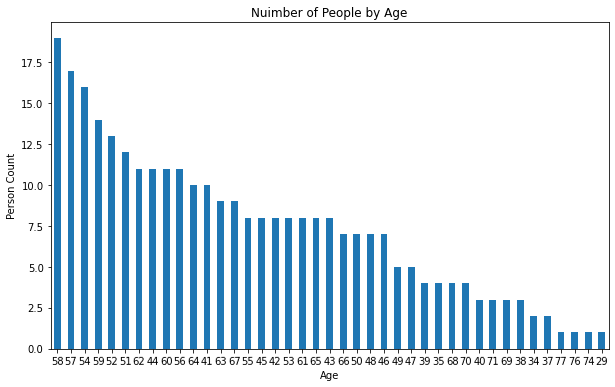

In [55]:
df.age.value_counts().plot.bar(figsize=(10,6))
plt.title('Nuimber of People by Age')
plt.xlabel('Age')
plt.ylabel('Person Count')
plt.xticks(rotation=1);

In [56]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

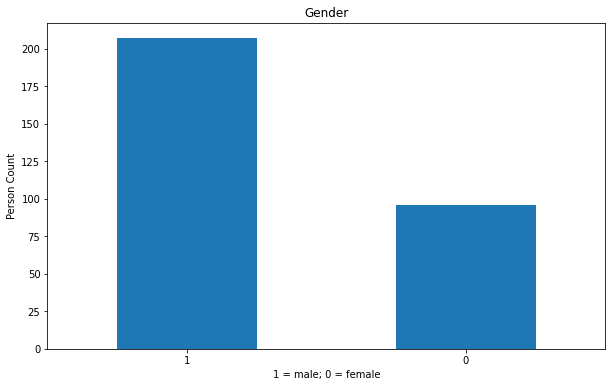

In [57]:
df.sex.value_counts().plot.bar(figsize=(10,6))
# plt.legend(['1 = male 0 = female'])
plt.title('Gender')
plt.xlabel('1 = male; 0 = female')
plt.ylabel('Person Count')
plt.xticks(rotation=0);

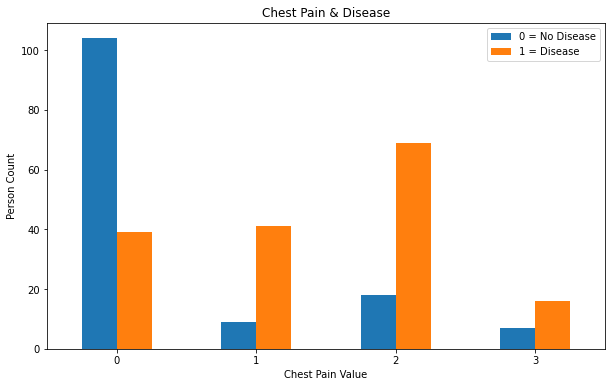

In [58]:
pd.crosstab(df.cp,df.target).plot.bar(figsize=(10,6))
plt.legend(['0 = No Disease','1 = Disease'])
plt.xticks(rotation=0)
plt.xlabel('Chest Pain Value')
plt.ylabel('Person Count')
plt.title('Chest Pain & Disease');

In [59]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


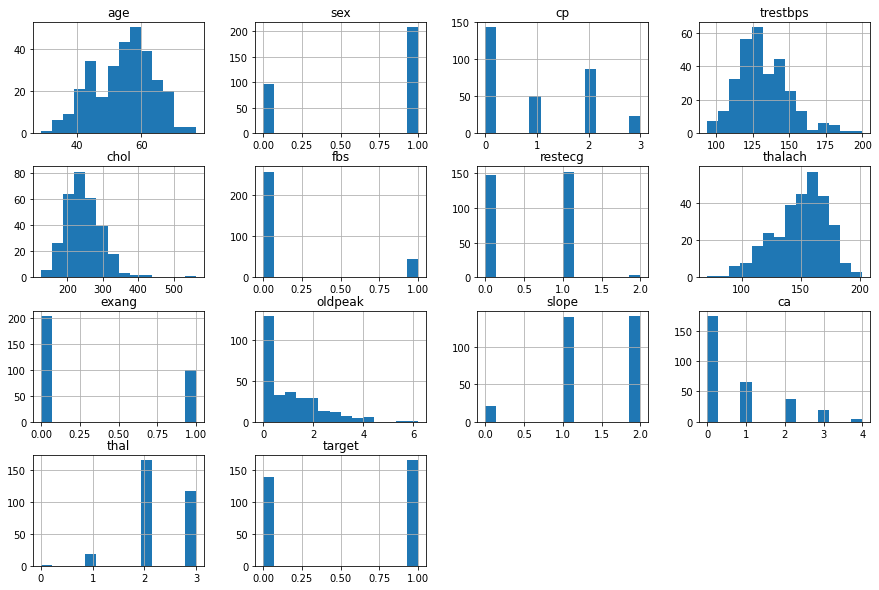

In [60]:
# Historgrams
df.hist(bins=14, figsize=(15,10));

In [62]:
df2 = df[df['chol'] > 500].index
df2

Int64Index([85], dtype='int64')

In [64]:
df3 = df.drop(df2, inplace=True)
df3

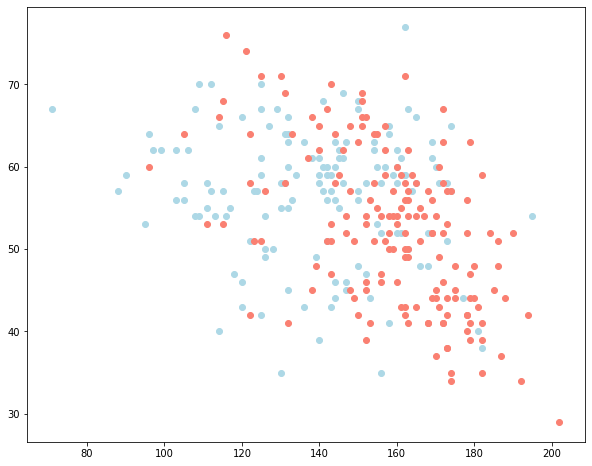

In [79]:
# Scatter plots
plt.figure(figsize=(10,8))

plt.scatter(df.thalach[df.target==0],
            df.age[df.target==0], 
            c='lightblue')
plt.scatter(df.thalach[df.target==1],
            df.age[df.target==1], 
            c='salmon');

In [80]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.324503,0.685430,0.963576,131.678808,245.211921,0.149007,0.529801,149.612583,0.327815,1.037748,1.400662,0.731788,2.311258,0.543046
std,9.067887,0.465115,1.032044,17.541015,48.567877,0.356686,0.525849,22.935390,0.470196,1.162552,0.616818,1.023438,0.612011,0.498970
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.250000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,417.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [81]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.092298,-0.073638,0.285074,0.198768,0.123668,-0.112119,-0.402041,0.100419,0.208534,-0.166471,0.280763,0.063155,-0.230720
sex,-0.092298,1.000000,-0.044712,-0.061698,-0.180288,0.043168,-0.063420,-0.041983,0.138885,0.098835,-0.034012,0.115297,0.216728,-0.277867
cp,-0.073638,-0.044712,1.000000,0.050920,-0.104171,0.096018,0.047920,0.294850,-0.392937,-0.151145,0.122160,-0.179131,-0.166087,0.432080
trestbps,0.285074,-0.061698,0.050920,1.000000,0.152531,0.176532,-0.117638,-0.045357,0.065577,0.195103,-0.123786,0.099375,0.065977,-0.142466
chol,0.198768,-0.180288,-0.104171,0.152531,1.000000,0.023294,-0.139828,-0.020472,0.086855,0.047183,0.009799,0.090977,0.081377,-0.111147
fbs,0.123668,0.043168,0.096018,0.176532,0.023294,1.000000,-0.085748,-0.007946,0.024729,0.006420,-0.060852,0.137147,-0.030539,-0.026826
restecg,-0.112119,-0.063420,0.047920,-0.117638,-0.139828,-0.085748,1.000000,0.045723,-0.073235,-0.057278,0.091099,-0.074610,-0.008272,0.140706
thalach,-0.402041,-0.041983,0.294850,-0.045357,-0.020472,-0.007946,0.045723,1.000000,-0.378200,-0.345162,0.388160,-0.212357,-0.098362,0.421096
exang,0.100419,0.138885,-0.392937,0.065577,0.086855,0.024729,-0.073235,-0.378200,1.000000,0.289683,-0.259635,0.114280,0.209952,-0.435601
oldpeak,0.208534,0.098835,-0.151145,0.195103,0.047183,0.006420,-0.057278,-0.345162,0.289683,1.000000,-0.577124,0.224102,0.208964,-0.432927


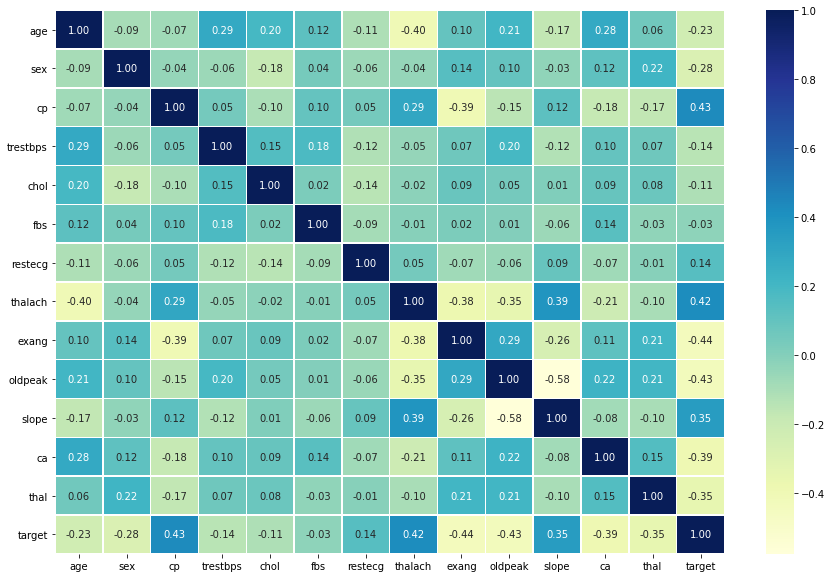

In [85]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(corr_matrix,
            annot=True,
            linewidth=0.5,
            fmt='.2f',
            cmap='YlGnBu');

In [86]:
df.shape

(302, 14)

In [89]:
# SKLearn
# Metrics
from sklearn.metrics import accuracy_score, precision_score,f1_score,recall_score
from sklearn.metrics import roc_auc_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Make sure the data stays the same so other people can mimic the results
np.random.seed(42)
X = df.drop('target', axis=1)
y = df.target

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)
X_train.shape, X_test.shape

((241, 13), (61, 13))

In [95]:
models = {'Logistic Regression': LogisticRegression(),
          'Random Forest': RandomForestClassifier(),
          'LinearSVC': LinearSVC(),
          'SVC': SVC(),
          'KNN': KNeighborsClassifier()}


def fit_and_score(model,X_train,X_test,y_train,y_test):
  """
  model = model
  X_train = X_train
  X_test = X_test
  y_train = y_train
  y_test = y_test
  """
  # For replicating data
  np.random.seed(42)

  # Store data
  model_dict = {}

  for name, model in models.items():
    model.fit(X_train,y_train)
    model_dict[name] = model.score(X_test,y_test)
  
  return model_dict

In [97]:
model_scores = fit_and_score(model=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


{'KNN': 0.639344262295082,
 'LinearSVC': 0.5409836065573771,
 'Logistic Regression': 0.8688524590163934,
 'Random Forest': 0.819672131147541,
 'SVC': 0.6721311475409836}

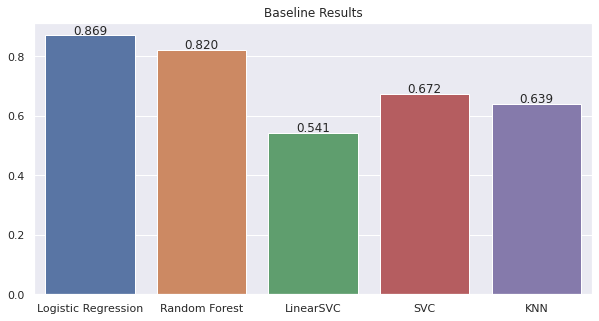

In [98]:
# plot vertical barplot
sns.set(rc={'figure.figsize':(10,5)})
ax = sns.barplot(x=list(model_scores.keys()), y=list(model_scores.values()))
ax.set(title='Baseline Results') # title barplot
# label each bar in barplot
for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
 y = height+0.005, # y-coordinate position of data label, padded 100 above bar
 s = '{:.3f}'.format(height), # data label, formatted to ignore decimals
 ha = 'center') # sets horizontal alignment (ha) to center